<a href="https://colab.research.google.com/github/chrisluedtke/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import requests

names_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names'
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

In [12]:
r = requests.get(names_url)
print(r.text)

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [106]:
df = pd.read_csv(data_url, names=['age', 'op_year', 'pos_nodes', '5_yr_outcome'])
df.head()

,age,op_year,pos_nodes,5_yr_outcome
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [107]:
# Validate appropriate number of observations

df.shape

(306, 4)

In [108]:
# Validate no missing values.

df.isnull().sum()

age             0
op_year         0
pos_nodes       0
5_yr_outcome    0
dtype: int64

In [0]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years 

df['5_yr_outcome'] = df['5_yr_outcome'].replace({2:0})

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [110]:
df.describe()

,age,op_year,pos_nodes,5_yr_outcome
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [111]:
df.dtypes

age             int64
op_year         int64
pos_nodes       int64
5_yr_outcome    int64
dtype: object

age


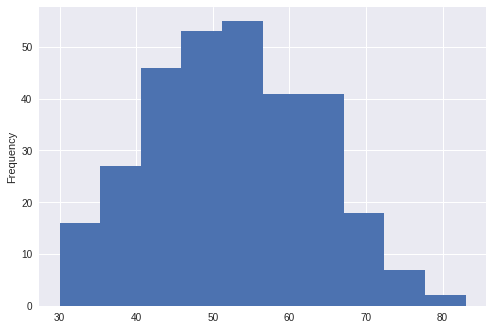

op_year


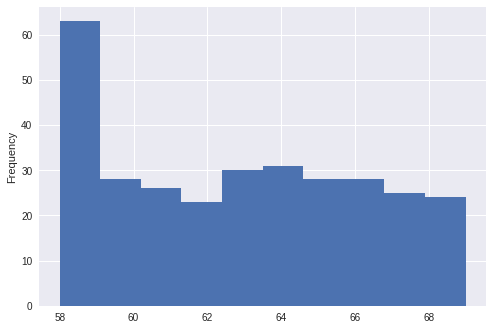

pos_nodes


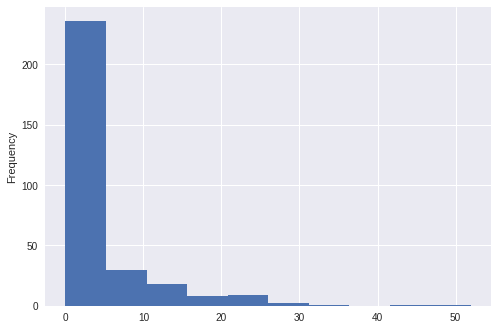

5_yr_outcome


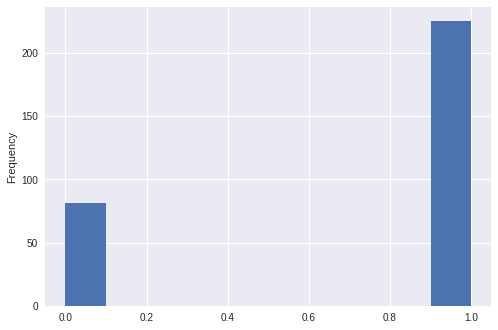

In [112]:
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int']).columns:
  print(col)
  df[col].plot.hist()
  plt.show()

In [118]:
df.corr()

,age,op_year,pos_nodes,5_yr_outcome
age,1.000000,0.089529,-0.063176,-0.067950
op_year,0.089529,1.000000,-0.003764,0.004768
pos_nodes,-0.063176,-0.003764,1.000000,-0.286768
5_yr_outcome,-0.067950,0.004768,-0.286768,1.000000


In [0]:
import numpy as np

def correlate_sort(df: pd.DataFrame, method: str = 'pearson') -> pd.DataFrame:
  """
  pd.DataFrame.corr() without redundancy and sorted by strength
  """
  df = df.corr(method)
  df = df.mask(np.tril(np.ones(df.shape)).astype(np.bool))
  df = df.stack().reset_index()
  df = df.rename(columns={0:method})
  
  df['sort'] = df[method].abs()
  df = df.sort_values('sort', ascending=False)
  
  return df.drop('sort', axis=1).reset_index(drop=True)

In [124]:
correlate_sort(df)

,level_0,level_1,pearson
0,pos_nodes,5_yr_outcome,-0.286768
1,age,op_year,0.089529
2,age,5_yr_outcome,-0.067950
3,age,pos_nodes,-0.063176
4,op_year,5_yr_outcome,0.004768
5,op_year,pos_nodes,-0.003764


In [0]:
def plot_corr_across_bin(df, col_to_bin, corr_cols):
  col_1, col_2 = corr_cols
  
  bin_colname = f'{col_to_bin}_bin'
  corr_col_name = f'{col_1} & {col_2} correlation'
  
  df[bin_colname] = pd.cut(df[col_to_bin], 10)
  
  grpd_corr = df.groupby(bin_colname)[[col_1, col_2]].corr().reset_index()
  grpd_corr = grpd_corr.loc[grpd_corr[col_2] != 1, [f'{col_to_bin}_bin', col_2]]

  grpd_corr.columns = [bin_colname, corr_col_name]

  plot = grpd_corr.plot(x=bin_colname, y=corr_col_name, xticks=range(0, 10, 2), ylim=(-1, 1))
  
  return plot

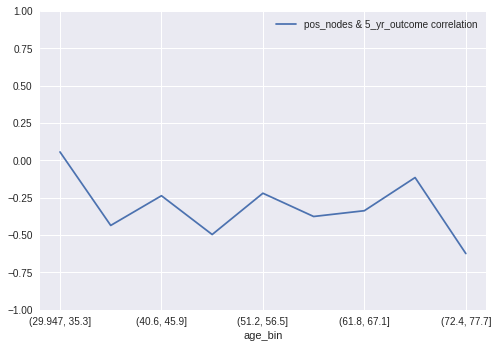

In [132]:
plot_corr_across_bin(df, 'age', ['pos_nodes', '5_yr_outcome'])

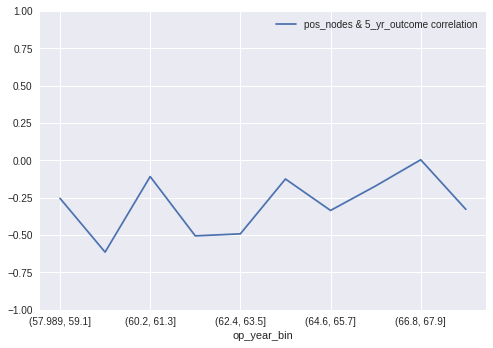

In [133]:
plot_corr_across_bin(df, 'op_year', ['pos_nodes', '5_yr_outcome'])

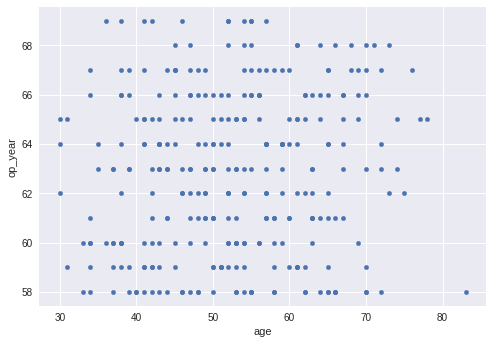

In [139]:
df.plot.scatter('age', 'op_year')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
    * Age has a weak positive relationship with survival
- What is at least one feature that looks to have a negative relationship with survival?
    * Number of positive nodes has a negative relationship with survival
- How are those two features related with each other, and what might that mean?
    * The number of positive nodes appears to predict survival rate. The correlation tends to hold true regardless of patient age. Interestingly, the correlation appears to have weakened in more recent operations. To check one potential confound in that statement, I investigated whether more recent operations tended to occur on on younger patients. That does not appear to be the case.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.